<center>
    <h1>Room Occupancy Estimation - DM, TM and BDA</h1>
    <h2>Results</h2>
    <h3>Riccardo Spolaor</h3>
    <h4>riccardo.spolaor@studio.unibo.it</h4>
</center>

---
In this notebook the results of the prediction task on the ***Room Occupancy Estimation*** dataset by the various models is shown.

In [1]:
# Matplotlib settings

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import os
import pickle

In [3]:
results_folder = 'results'
model_names_dict = {
    'rfc': 'Random Forest Classifier',
    'lr': 'Logistic Regression',
    'nb': 'Naive Bayes',
    'mlp': 'Multi Layer Perceptron',
    'svm': 'Support Vector Machine',
    'gbt': 'Gradient Boosted Tree'}

In [4]:
val_results = {}
test_results = {}
test_threshold_results = {}

for m, n in model_names_dict.items():
    try:
        with open(os.path.join(results_folder, m, 'val.pickle'), 'rb') as f:
            val_results[n] = pickle.load(f)
        with open(os.path.join(results_folder, m, 'test.pickle'), 'rb') as f:
            test_results[n] = pickle.load(f)
        with open(os.path.join(results_folder, m, 'test_thresholds.pickle'), 'rb') as f:
            test_threshold_results[n] = pickle.load(f)
    except:
        pass
    
val_results = dict(sorted(val_results.items()))
test_results = dict(sorted(test_results.items()))
test_threshold_results = dict(sorted(test_threshold_results.items()))

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18768\2649036449.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(val_results.keys(), rotation=45)


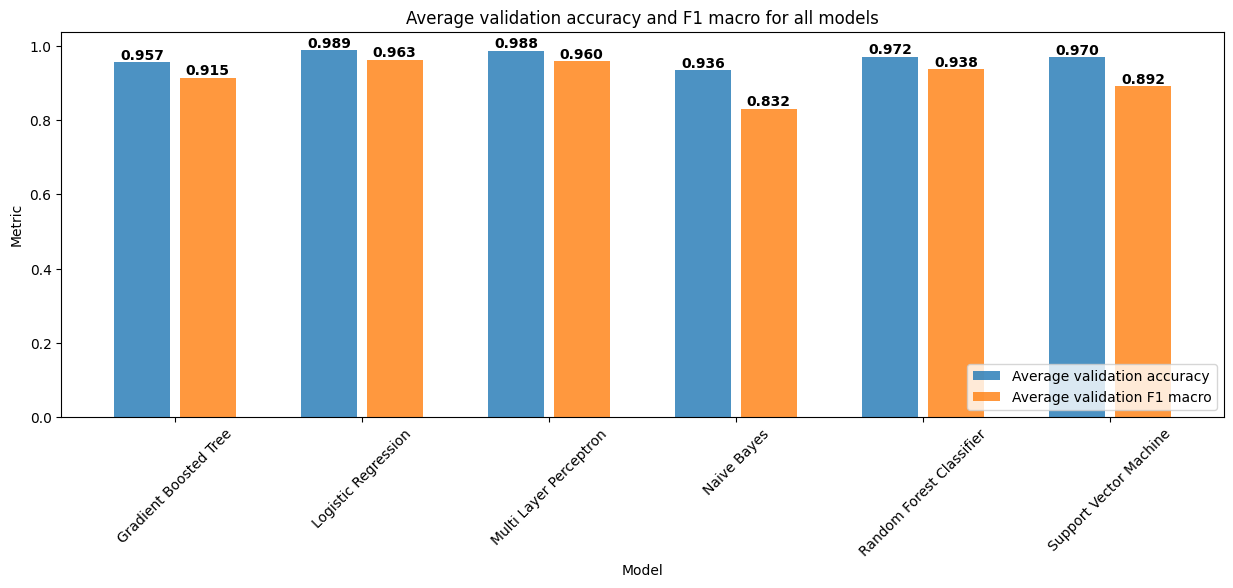

In [5]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.set_title('Average validation accuracy and F1 macro for all models')
ax.set_xlabel('Model')
ax.set_ylabel('Metric')
ax.set_xticklabels(val_results.keys(), rotation=45)
ax.set_xticks(range(len(val_results)))

ax.bar(
    [i -.025 for i in range(len(val_results))],
    [val_results[m]['average accuracy'] for m in val_results.keys()],
    width=-0.3,
    alpha=0.8,
    align='edge',
    label='Average validation accuracy')
ax.bar_label(ax.containers[0], fmt='%.3f', label_type='edge', weight='bold')
ax.bar(
    [i + .025 for i in range(len(val_results))],
    [val_results[m]['average F1 macro'] for m in val_results.keys()],
    width=0.3,
    alpha=0.8,
    align='edge',
    label='Average validation F1 macro')
ax.bar_label(ax.containers[1], fmt='%.3f', label_type='edge', weight='bold')
ax.legend(loc='lower right')

plt.show()

In [6]:
models_with_threshold_selection = sorted([m for m in model_names_dict.values() if m in test_threshold_results.keys()])

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18768\1524474668.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models_with_threshold_selection, rotation=45)


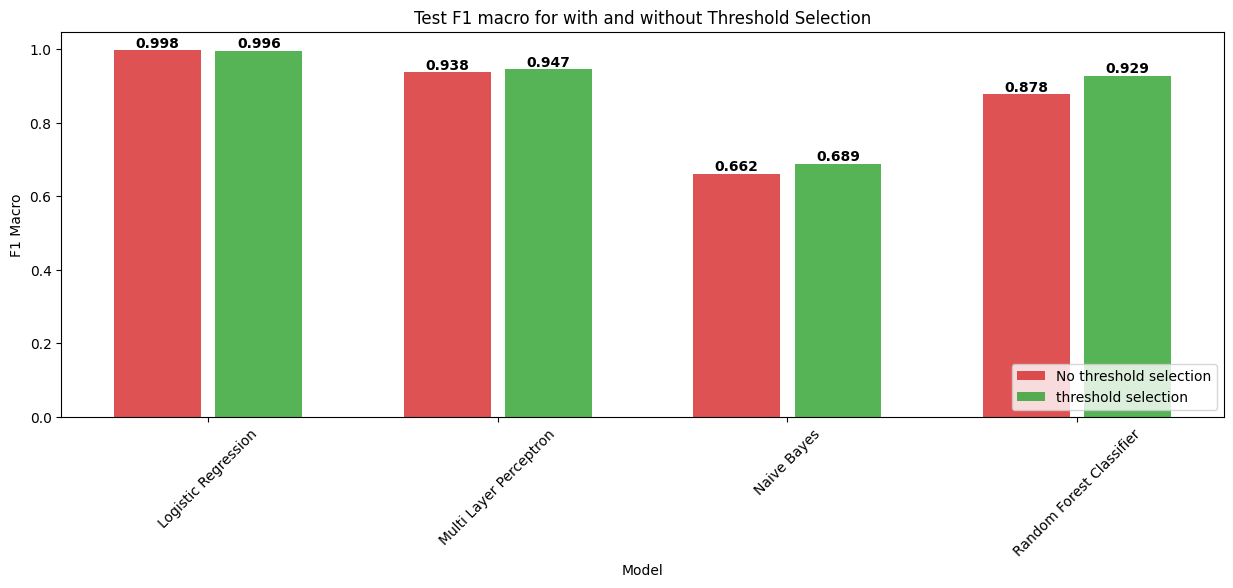

In [7]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)
ax.set_title('Test F1 macro for with and without Threshold Selection')
ax.set_xlabel('Model')
ax.set_ylabel('F1 Macro')
ax.set_xticklabels(models_with_threshold_selection, rotation=45)
ax.set_xticks(range(len(models_with_threshold_selection)))

ax.bar(
    [i - .025 for i in range(len(models_with_threshold_selection))],
    [test_results[m]['F1 macro'] for m in models_with_threshold_selection],
    width=-0.3,
    alpha=0.8,
    align='edge',
    color='tab:red',
    label='No threshold selection')
ax.bar_label(ax.containers[0], fmt='%.3f', label_type='edge', weight='bold')
ax.bar(
    [i + .025 for i in range(len(models_with_threshold_selection))],
    [test_threshold_results[m]['F1 macro'] for m in models_with_threshold_selection],
    width=0.3,
    alpha=0.8,
    align='edge',
    color='tab:green',
    label='threshold selection')
ax.bar_label(ax.containers[1], fmt='%.3f', label_type='edge', weight='bold')
ax.legend(loc='lower right')

plt.show()
    

In [8]:
best_test_models = {
    m: test_results[m] if m not in models_with_threshold_selection or m == 'Logistic Regression' else test_threshold_results[m]
    for m in test_results.keys()}

C:\Users\riccardo\AppData\Local\Temp\ipykernel_18768\143273046.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(best_test_models.keys(), rotation=45)


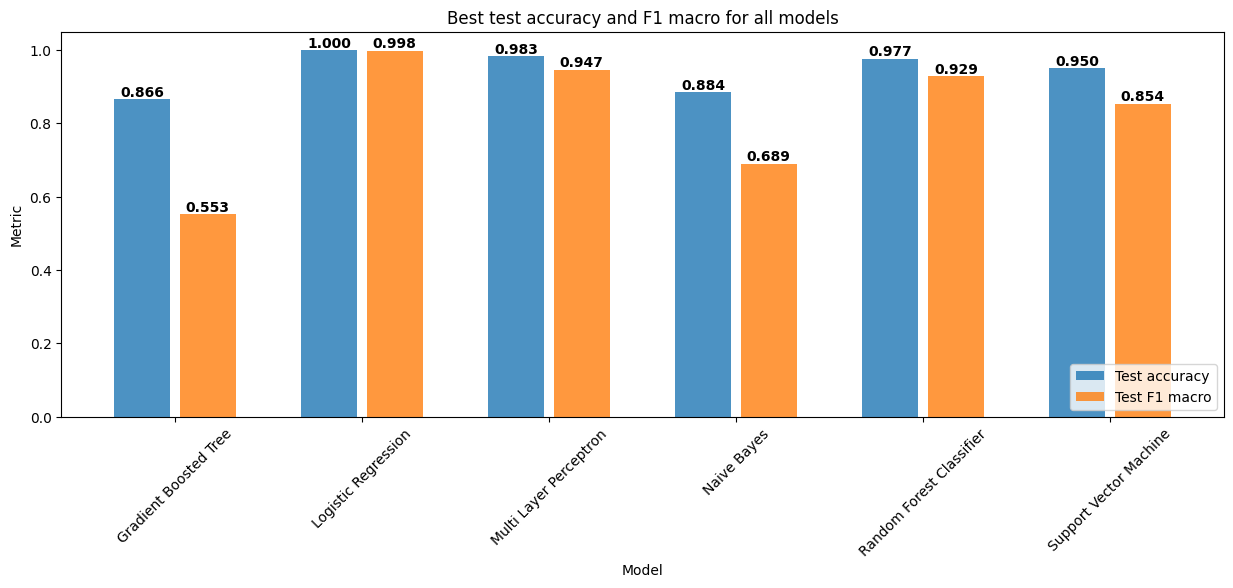

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.set_title('Best test accuracy and F1 macro for all models')
ax.set_xlabel('Model')
ax.set_ylabel('Metric')
ax.set_xticklabels(best_test_models.keys(), rotation=45)
ax.set_xticks(range(len(best_test_models)))

ax.bar(
    [i - .025 for i in range(len(best_test_models))],
    [best_test_models[m]['accuracy'] for m in best_test_models.keys()],
    width=-0.3,
    align='edge',
    label='Test accuracy',
    alpha=0.8)
ax.bar_label(ax.containers[0], fmt='%.3f', label_type='edge', weight='bold')
ax.bar(
    [i + .025 for i in range(len(best_test_models))],
    [best_test_models[m]['F1 macro'] for m in best_test_models.keys()],
    width=0.3,
    align='edge',
    label='Test F1 macro',
    alpha=0.8)
ax.bar_label(ax.containers[1], fmt='%.3f', label_type='edge', weight='bold')
ax.legend(loc='lower right')

plt.show()